In [ ]:
from data_module_F import *
from model_module_F import *
from evaluation_module_F import *
from feature_module_F import *


from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_pinball_loss
from sklearn.linear_model import QuantileRegressor

tf.random.set_seed(155)

In [ ]:
# ######## GPU RAM memory ##########
os.environ["CUDA_VISIBLE_DEVICES"]="0"

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 15*1GB of memory on the first GPU
    try:
        tf.config.set_logical_device_configuration(
            gpus[0],
            [tf.config.LogicalDeviceConfiguration(memory_limit=1024*5)])
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
            print(e)

In [3]:
method = 'cnnIncompTest'
dir_n = 'evaluation/'
dir_n

'evaluation/'

# Load prediction/reference values from differet modeling approaches #

## 5CV evaluation ##

In [8]:
preds = pd.read_csv('Predictions/Predictions_all_incomp.csv').drop(['Unnamed: 0'], axis=1)
# preds = pd.read_csv('Predictions/Predictions_all_inex.csv').drop(['Unnamed: 0'], axis=1)
# preds = pd.read_csv('Predictions/Predictions_all_incompTRY.csv').drop(['Unnamed: 0'], axis=1)
# preds = pd.read_csv('Predictions/Predictions_all_cnnsingle.csv').drop(['Unnamed: 0'], axis=1)
# preds = pd.read_csv('Predictions/Predictions_all_plsrsingle.csv').drop(['Unnamed: 0'], axis=1)

preds

LMA (g/m²) Predictions  N content (mg/cm²) Predictions  \
0                  62.873330                        0.123981   
1                  39.101254                        0.104877   
2                  46.549942                        0.117216   
3                  54.670180                        0.117106   
4                  28.375930                        0.069073   
...                      ...                             ...   
5568              307.441250                        0.419976   
5569              320.856000                        0.260944   
5570              297.630520                        0.304622   
5571               77.684240                        0.239491   
5572              101.596040                        0.220785   

      LAI (m²/m²) Predictions  C content (mg/cm²) Predictions  \
0                    4.123696                        2.679194   
1                    3.559866                        1.999582   
2                    3.872088                        2.342716   
3                    3.829381                        2.724224   
4                    2.816354                        1.656770   
...                       ...                             ...   
5568                 2.555300                       16.254879   
5569                 2.052638                       17.267076   
5570                 2.298634                       16.510386   
5571                 3.610252                        4.118573   
5572                 2.925116                        5.546672   

      Chl content (μg/cm²) Predictions  EWT (mg/cm²) Predictions  \
0                            32.232790                 17.669075   
1                            42.851600                 22.966404   
2                            37.573196                 21.191170   
3                            24.185139                 11.820810   
4                            20.387383                  8.533672   
...                                ...                       ...   
5568                         45.635240                 36.466717   
5569                         33.298054                 30.307370   
5570                         37.506104                 27.798752   
5571                         55.169495                 11.420364   
5572                         35.618275                 13.499563   

      Carotenoid content (μg/cm²) Predictions  \
0                                    7.954594   
1                                    7.287200   
2                                    6.692472   
3                                    6.022436   
4                                    5.727028   
...                                       ...   
5568                                 9.265262   
5569                                 5.907606   
5570                                 8.202664   
5571                                10.847924   
5572                                 7.942267   

      Phosphorus content (mg/cm²) Predictions  Lignin (mg/cm²) Predictions  \
0                                    0.011032                     0.738424   
1                                    0.012217                     0.724716   
2                                    0.012152                     0.707343   
3                                    0.013779                     0.735029   
4                                    0.007894                     0.670258   
...                                       ...                          ...   
5568                                 0.030169                     8.222233   
5569                                 0.020193                     7.803913   
5570                                 0.025585                     7.205658   
5571                                 0.015409                     1.783225   
5572                                 0.014858                     2.303091   

      Cellulose (mg/cm²) Predictions  Fiber (mg/cm²) Predictions  \
0                           1.167592         

In [9]:
paths = ['dataset/testCV_{}'.format(i) for i in range(1,6)]

obs = collectPredictions(paths)[Traits_area+Traits_mass]
obs

LMA (g/m²)  N content (mg/cm²)  LAI (m²/m²)  C content (mg/cm²)  \
0      64.246143            0.152584          NaN                 NaN   
1      29.991254            0.093849          NaN                 NaN   
2     102.182577            0.244742          NaN                 NaN   
3      45.927204            0.097273          NaN                 NaN   
4      28.778572            0.052461          NaN                 NaN   
...          ...                 ...          ...                 ...   
5568  256.608367            0.268975          NaN           14.838871   
5569  258.250969            0.179866          NaN           14.242363   
5570  205.855596            0.260126          NaN           11.590942   
5571   87.112061            0.285431          NaN            4.574872   
5572  115.946591            0.156440          NaN            6.612251   

      Chl content (μg/cm²)  EWT (mg/cm²)  Carotenoid content (μg/cm²)  \
0                26.526906     26.592068                          NaN   
1                30.036702     17.796417                          NaN   
2                47.904198     46.313387                          NaN   
3                27.871200      8.695349                          NaN   
4                17.604459      9.342698                          NaN   
...                    ...           ...                          ...   
5568                   NaN           NaN                          NaN   
5569                   NaN           NaN                          NaN   
5570                   NaN           NaN                          NaN   
5571             69.489912           NaN                    13.085935   
5572                   NaN           NaN                          NaN   

      Phosphorus content (mg/cm²)  Lignin (mg/cm²)  Cellulose (mg/cm²)  ...  \
0                             NaN              NaN                 NaN  ...   
1                             NaN              NaN                 NaN  ...   
2                             NaN              NaN                 NaN  ...   
3                             NaN              NaN                 NaN  ...   
4                             NaN              NaN                 NaN  ...   
...                           ...              ...                 ...  ...   
5568                     0.013184         6.136495            5.231881  ...   
5569                          NaN         5.728022            5.522167  ...   
5570                     0.017480         5.433022            3.839470  ...   
5571                     0.024512         1.855472            1.417820  ...   
5572                          NaN         2.524229            2.061123  ...   

      Magnesium concentration (mg/g)  Fiber (mg/g)  Lignin (mg/g)  \
0                           2.393797           NaN            NaN   
1                           1.274930           NaN            NaN   
2                           3.431431           NaN            NaN   
3                           3.962479           NaN            NaN   
4                           1.524930           NaN            NaN   
...                              ...           ...            ...   
5568                        1.509657    473.147284     239.138552   
5569                        1.332110    459.627846     221.800598   
5570                        1.837834    428.438434     263.923955   
5571                        3.441663    351.256043     212.998306   
5572                        2.337983    359.567855     217.706226   

      Cellulose (mg/g)  Potassium concentration (mg/g)  \
0                  NaN                             NaN   
1                  NaN                             NaN   
2                  NaN                             NaN   
3                  NaN                             NaN   
4                  NaN                             NaN   
...                ...                             ...   
5568        203.885827                             NaN   
5569      

In [10]:
### Defines Traits to be evauated ###
Traits = obs.columns[:20].to_list()
Traits

['LMA (g/m²)',
 'N content (mg/cm²)',
 'LAI (m²/m²)',
 'C content (mg/cm²)',
 'Chl content (μg/cm²)',
 'EWT (mg/cm²)',
 'Carotenoid content (μg/cm²)',
 'Phosphorus content (mg/cm²)',
 'Lignin (mg/cm²)',
 'Cellulose (mg/cm²)',
 'Fiber (mg/cm²)',
 'Anthocyanin content (μg/cm²)',
 'NSC (mg/cm²)',
 'Magnesium content (mg/cm²)',
 'Ca content (mg/cm²)',
 'Potassium content (mg/cm²)',
 'Boron content (mg/cm²)',
 'Copper content (mg/cm²)',
 'Sulfur content (mg/cm²)',
 'Manganese content (mg/cm²)']

In [23]:
######## Residual data for uncertainty estimation #######

residuals_error = abs(obs[Traits].T.reset_index(drop=True).T - preds.T.reset_index(drop=True).T)
# residuals_error = (obs.T.reset_index(drop=True).T - preds.T.reset_index(drop=True).T)
residuals_error.columns = Traits

residuals_error = residuals_error / (obs[Traits].quantile(0.95)-obs[Traits].quantile(0.05))
residuals_error

LMA (g/m²)  N content (mg/cm²)  LAI (m²/m²)  C content (mg/cm²)  \
0       0.006982            0.098732          NaN                 NaN   
1       0.046334            0.038070          NaN                 NaN   
2       0.282949            0.440204          NaN                 NaN   
3       0.044467            0.068461          NaN                 NaN   
4       0.002048            0.057343          NaN                 NaN   
...          ...                 ...          ...                 ...   
5568    0.258538            0.521235          NaN            0.098885   
5569    0.318411            0.279870          NaN            0.211226   
5570    0.466770            0.153591          NaN            0.343542   
5571    0.047950            0.158580          NaN            0.031865   
5572    0.072987            0.222111          NaN            0.074413   

      Chl content (μg/cm²)  EWT (mg/cm²)  Carotenoid content (μg/cm²)  \
0                 0.127508      0.301780                          NaN   
1                 0.286372      0.174851                          NaN   
2                 0.230865      0.849645                          NaN   
3                 0.082372      0.105705                          NaN   
4                 0.062189      0.027362                          NaN   
...                    ...           ...                          ...   
5568                   NaN           NaN                          NaN   
5569                   NaN           NaN                          NaN   
5570                   NaN           NaN                          NaN   
5571              0.320016           NaN                     0.265492   
5572                   NaN           NaN                          NaN   

      Phosphorus content (mg/cm²)  Lignin (mg/cm²)  Cellulose (mg/cm²)  \
0                             NaN              NaN                 NaN   
1                             NaN              NaN                 NaN   
2                             NaN              NaN                 NaN   
3                             NaN              NaN                 NaN   
4                             NaN              NaN                 NaN   
...                           ...              ...                 ...   
5568                     0.559796         0.258725            0.108267   
5569                          NaN         0.257504            0.146726   
5570                     0.267128         0.219887            0.310986   
5571                     0.300027         0.008962            0.030829   
5572                          NaN         0.027431            0.078303   

      Fiber (mg/cm²)  Anthocyanin content (μg/cm²)  NSC (mg/cm²)  \
0                NaN                           NaN           NaN   
1                NaN                           NaN           NaN   
2                NaN                           NaN           NaN   
3                NaN                           NaN           NaN   
4                NaN                           NaN           NaN   
...              ...                           ...           ...   
5568        0.138740                           NaN      0.063056   
5569        0.232070                           NaN      0.014643   
5570        0.326650                           NaN      0.285177   
5571        0.035914                           NaN      0.014841   
5572        0.065562                           NaN      0.106820   

      Magnesium content (mg/cm²)  Ca content (mg/cm²)  \
0                       0.003197             0.511477   
1                       0.057003             0.080982   
2                       0.507390             0.419376   
3                       0.048325             0.105702   
4                       0.032917             0.028796   
...                          ...                  ...   
5568                    0.070476             0.475613   
5569                    0.437876             0.950838   
5570                    0.059224 

## Metrics from the Cross Validation ##

In [6]:
## 5-CV metrics ##

# test = all_scores(Traits, Traits, obs, preds, weights)
test = all_scores(Traits, Traits, obs.loc[preds.index], preds)
# test = all_scores(Traits, Traits, obs.loc[preds.index], preds, method = method, save =True, dir_n = 'Predictions/')

test

LMA (g/m²)  N content (mg/cm²)  LAI (m²/m²)  C content (mg/cm²)  \
r2_score     0.772016            0.635454     0.671348            0.739252   
RMSE        32.502292            0.057980     0.942221            2.266731   
nRMSE (%)    9.110775           11.356006    14.084774           10.727146   
MAE         17.021260            0.037964     0.652112            1.240423   
Bias         1.471545            0.004876     0.041083            0.214529   

           Chl content (μg/cm²)  EWT (mg/cm²)  Carotenoid content (μg/cm²)  \
r2_score               0.532275      0.614973                     0.488501   
RMSE                   9.938006      5.748088                     1.980959   
nRMSE (%)             16.467817     13.617587                    13.877323   
MAE                    5.820627      3.437460                     1.174727   
Bias                   0.275565      0.713527                     0.091407   

           Phosphorus content (mg/cm²)  Lignin (mg/cm²)  Cellulose (mg/cm²)  \
r2_score                      0.580221         0.690695            0.700790   
RMSE                          0.006122         1.338430            1.023518   
nRMSE (%)                    13.163658        12.821958           12.737880   
MAE                           0.004207         0.800524            0.612067   
Bias                          0.000648         0.157451            0.118357   

           Fiber (mg/cm²)  Anthocyanin content (μg/cm²)  NSC (mg/cm²)  \
r2_score         0.715620                      0.606973      0.694208   
RMSE             2.437167                      0.256553      1.573570   
nRMSE (%)       12.354188                     13.330089     12.172502   
MAE              1.434464                      0.168846      0.935656   
Bias             0.250691                      0.040722      0.150879   

           Magnesium content (mg/cm²)  Ca content (mg/cm²)  \
r2_score                     0.350118             0.293915   
RMSE                         0.013021             0.085644   
nRMSE (%)                   16.240425            17.790736   
MAE                          0.008500             0.051171   
Bias                         0.001750             0.012675   

           Potassium content (mg/cm²)  Boron content (mg/cm²)  \
r2_score                     0.413493                0.413083   
RMSE                         0.048020                0.000200   
nRMSE (%)                   15.034275               15.094833   
MAE                          0.033130                0.000122   
Bias                         0.005602                0.000014   

           Copper content (mg/cm²)  Sulfur content (mg/cm²)  \
r2_score                  0.553137                 0.486268   
RMSE                      0.000022                 0.006542   
nRMSE (%)                14.010757                14.769129   
MAE                       0.000015                 0.004490   
Bias                      0.000002                 0.001144   

           Manganese content (mg/cm²)  
r2_score                     0.381882  
RMSE                         0.001818  
nRMSE (%)                   16.679390  
MAE                          0.001245  
Bias                         0.000240

### Results vis ##

In [83]:
def scatterPlot(obs, preds, Traits, test_tr, test, meta=None, sp = None, method = None, save =False, dir_n = None, figsize=(10, 13), quantile_vis=0.999, size=5.5):

    if sp is not None:
        n = len(meta[sp].unique())
        cmap = sns.color_palette('colorblind', n)

    plt.rc('font', size=size) #5.7
    plt.rcParams['lines.markersize'] = 4
    plt.rcParams['lines.linewidth'] = 0.5

    a = round((len(test_tr))/4) # number of rows
    b = 4  # number of columns
    c = 1  # initialize plot counter

    fig = plt.figure(figsize = figsize,dpi=300 ,constrained_layout=True)

    for j in range(len(test_tr)):
        f = preds.loc[:,Traits[Traits.index(test_tr[j])]+' Predictions']
        y = obs.loc[:,Traits[Traits.index(test_tr[j])]]

        idx = np.union1d(f[f.isna()].index,y[y.isna()].index)

        f.drop(idx, axis = 0, inplace=True)
        y.drop(idx, axis = 0, inplace=True)
        
        if meta is not None:
            m = meta.drop(idx, axis = 0)

        ax1 = plt.subplot(a, b, c)
        plt.axis('square')
        
        
        lim_max = min(f.quantile(quantile_vis),y.quantile(quantile_vis)) 
        lim_min = max(f.quantile(1-quantile_vis),y.quantile(1-quantile_vis))
        
        #######
        ax1.set_xlim(lim_min,lim_max)
        ax1.set_ylim(ax1.get_xlim())
        ax1.set_aspect('equal', adjustable='box')
        
        sns.lineplot(x=(lim_min,lim_max), y=(lim_min,lim_max), ax = ax1, color='black',legend='full', linestyle='dashed')
        
        y.name = y.name +' Observations'
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(f,y)
        sns.regplot(x= f, y=y, color='b', fit_reg= True, ax=ax1, scatter=False)

        if meta is not None:
            groups = pd.concat([f,y,m], axis=1).groupby(sp)

            for name, group in groups:
                ax1 = sns.regplot(x = group[test_tr[j]+' Predictions'], y = group[test_tr[j]+' Observations'] ,ax = ax1, fit_reg= False, ci=False, label= sp + ' {}'.format(group[sp].unique()[0]), scatter_kws={ "color": cmap[list(meta[sp].unique()).index(name)], 'alpha':0.6})
                ax1.set(xticks=ax1.get_xticks(), yticks=ax1.get_xticks())

        else:
            ax1 = sns.regplot(x = f, y = y ,fit_reg= False, ci=False, ax = ax1, scatter_kws={"color": "blue", 'alpha':0.6})
            ax1.set(xticks=ax1.get_xticks(), yticks=ax1.get_xticks())
        
        ann = 'y = {0:.2f}x+{1:.2f} \n R² = {2:.2f} \n nRMSE = {3:.2f}'.format(slope,intercept,test.loc['r2_score',test_tr][j],test.loc['nRMSE (%)',test_tr][j])

        ax1.annotate(ann,
            xy=(0.5,0.01),
            xycoords='axes fraction',
            horizontalalignment='left',
            verticalalignment='bottom',size=size)
        
        ann = test_tr[j]
        ax1.set_title(ann, y=1.1, pad=-5, fontdict = {'fontsize':size,
        'horizontalalignment': 'center', 'fontweight':'bold'})
        
        plt.xlabel(" ")
        plt.ylabel(" ")

        c = c + 1

    fig.supxlabel('Predictions', size=8, fontweight='bold', ha='center')
    fig.supylabel('Observations', size=8, fontweight='bold', ha='center')

    if(save):
        plt.savefig(dir_n + "ScatterFill_{}.pdf".format(method),bbox_inches = 'tight', dpi = 300)
        plt.savefig(dir_n + "ScatterFill_{}.svg".format(method),bbox_inches = 'tight', dpi = 300)
        plt.savefig(dir_n + "ScatterFill_{}.png".format(method),bbox_inches = 'tight', dpi = 300)

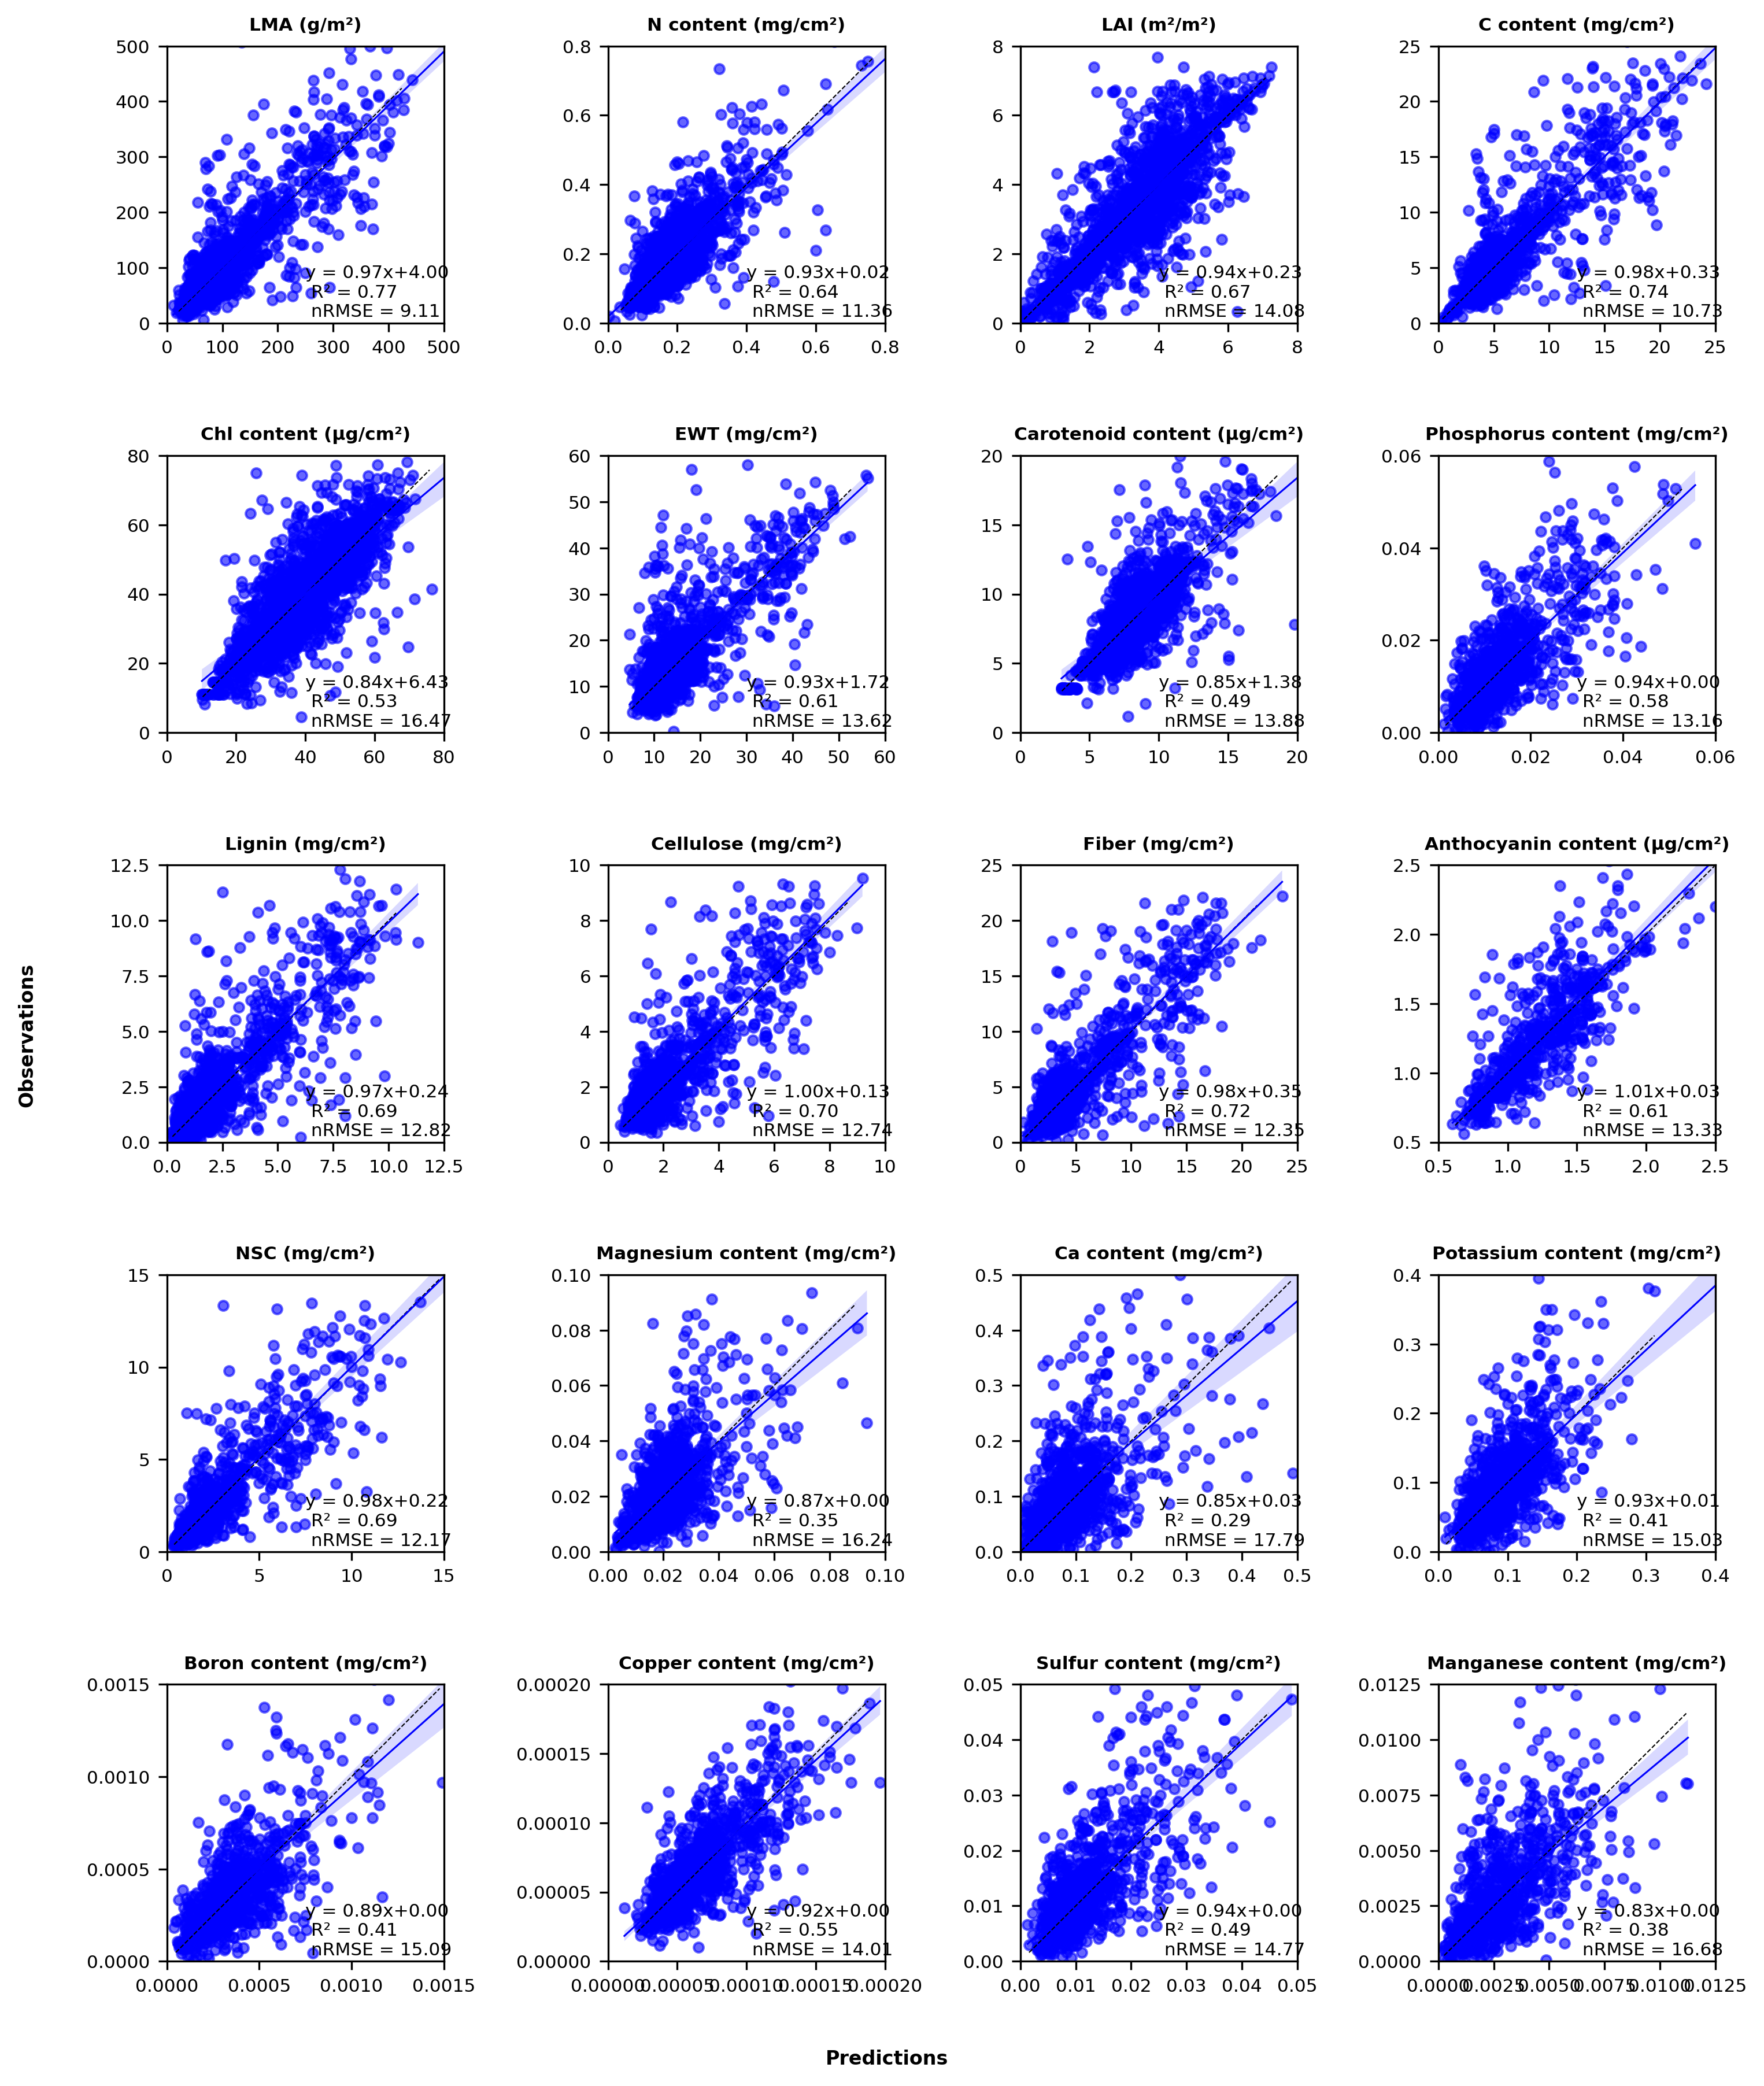

In [7]:
# scatterPlot(obs.loc[preds.index], preds, Traits, Traits, test, method = method, save =True, dir_n = dir_n, meta = meta, sp = 'LandCover', figsize=(10, 12), size=7.5)
# scatterPlot(obs.loc[preds.index], preds, Traits, Traits, test, meta = meta, sp = 'LandCover')

# scatterPlot(obs.loc[preds.index], preds, Traits, Traits, test, method = method, save =True, dir_n = dir_n, figsize=(10, 12))
scatterPlot(obs.loc[preds.index], preds, Traits, Traits, test, figsize=(10, 12), size=7.5)

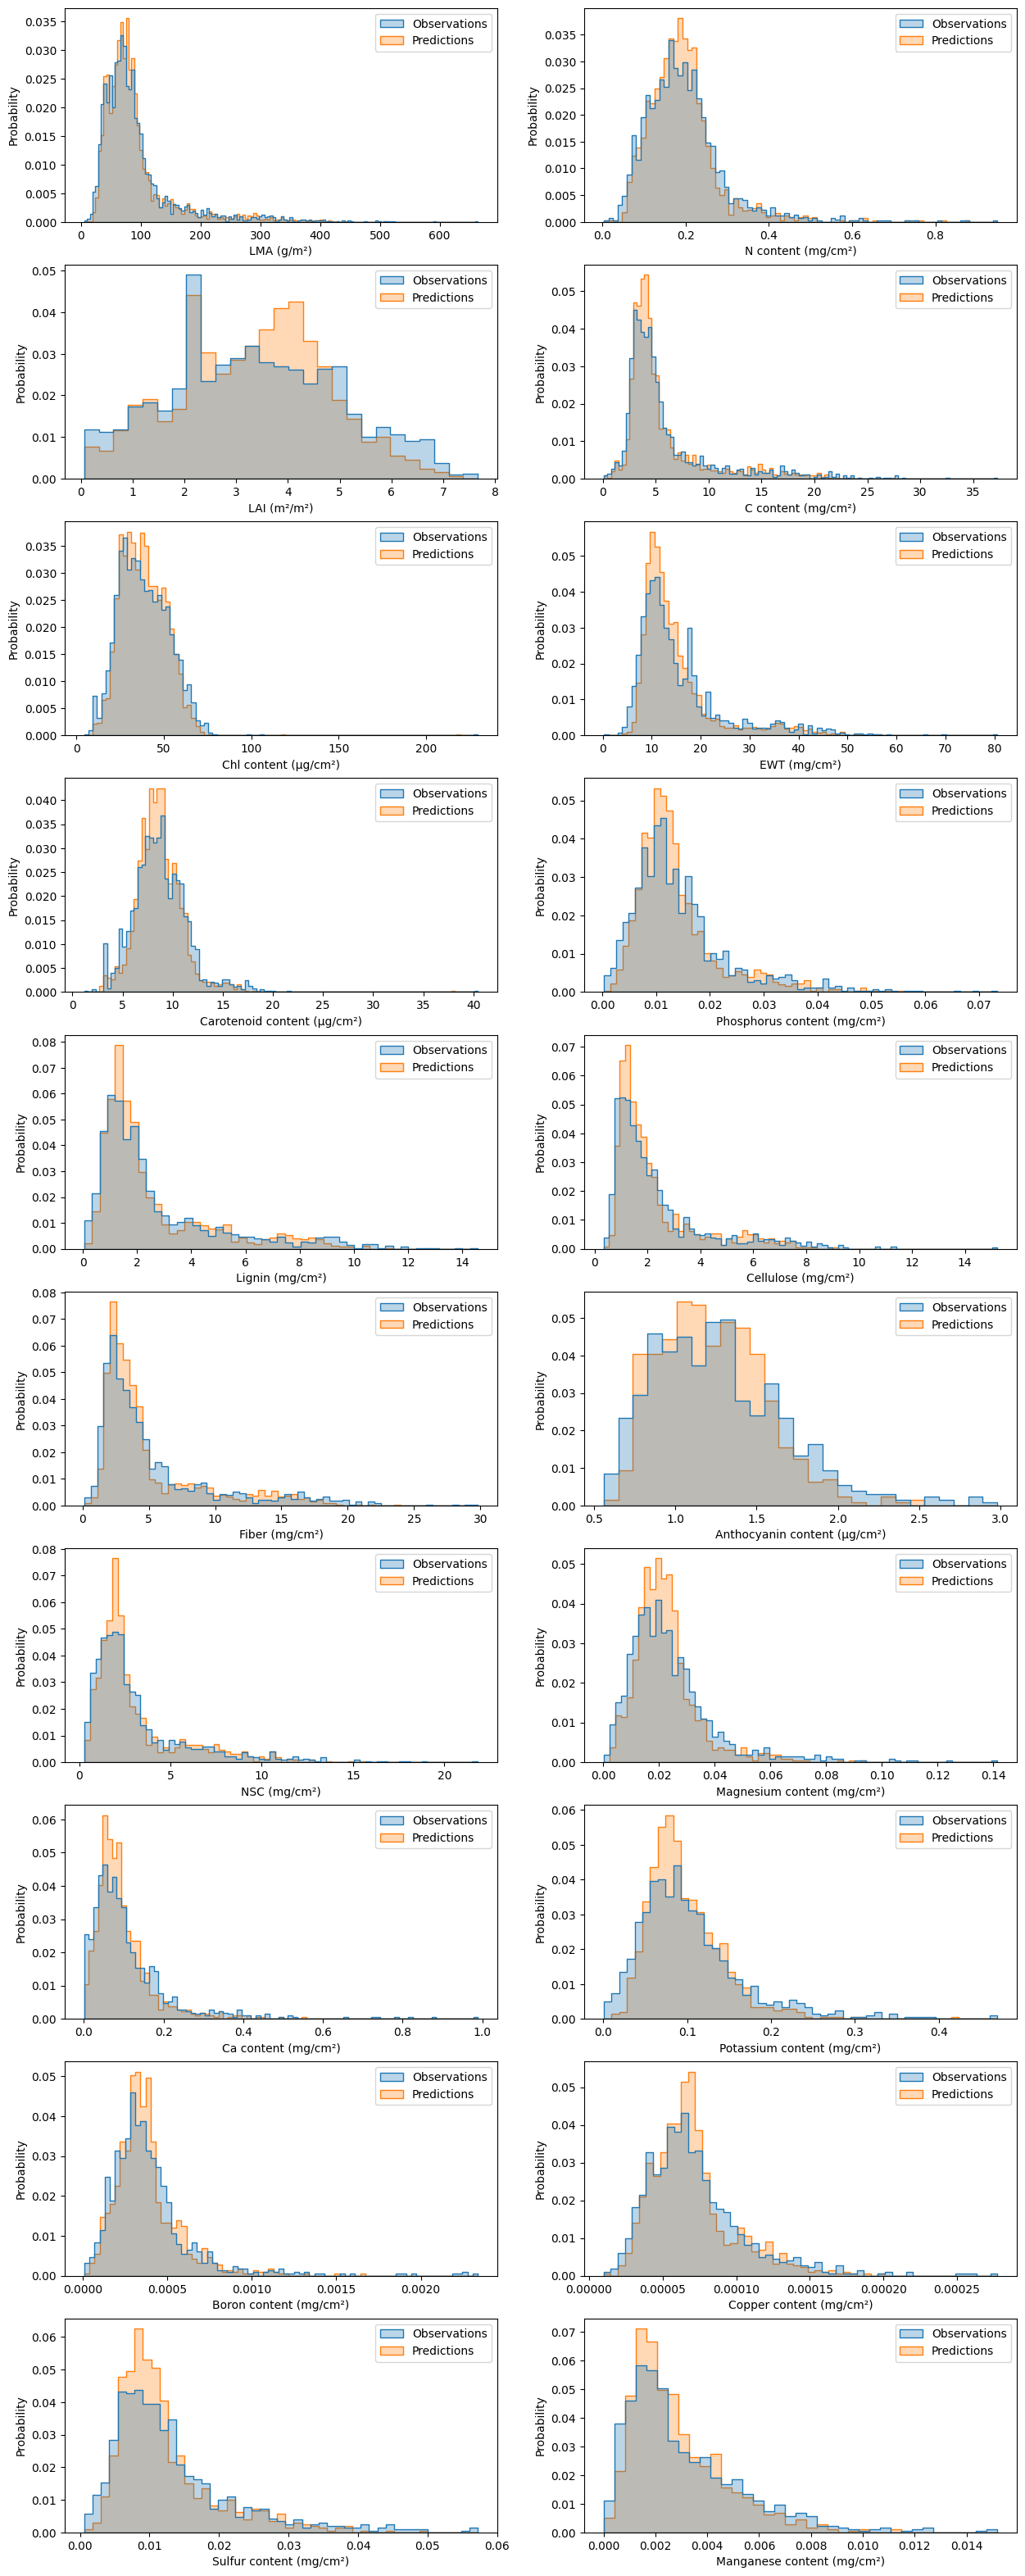

In [8]:
# histPlot(obs.loc[preds.index], preds, Traits, Traits, method = method, save =True, dir_n = dir_n)
histPlot(obs.loc[preds.index], preds, Traits, Traits)

## Mass vs area ###

In [8]:
run_area = ['Chl content (μg/cm²)',
'Carotenoid content (μg/cm²)',
'Anthocyanin content (μg/cm²)',
'Boron content (mg/cm²)',
'Ca content (mg/cm²)',
'Copper content (mg/cm²)',
'Magnesium content (mg/cm²)',
'Manganese content (mg/cm²)',
'NSC (mg/cm²)',
'Sulfur content (mg/cm²)',
'C content (mg/cm²)',
'Cellulose (mg/cm²)',
'Fiber (mg/cm²)',
'Lignin (mg/cm²)',
'N content (mg/cm²)',
'Phosphorus content (mg/cm²)',
'Potassium content (mg/cm²)']



run_mass =['Chlorophyll concentration (mg/g)',
'Carotenoid concentration (mg/g)',
'Anthocyanin concentration (mg/g)',
'Boron concentration (mg/g)',
'Ca concentration (mg/g)', 
'Copper concentration (mg/g)',
'Magnesium concentration (mg/g)', 
'Manganese concentration (mg/g)', 
'NSC (mg/g)',
'Sulfur concentration (mg/g)',
'C concentration (mg/g)', 
'Cellulose (mg/g)',
'Fiber (mg/g)',
'Lignin (mg/g)',
'N concentration (mg/g)',
'P concentration (mg/g)',   
'Potassium concentration (mg/g)']

In [9]:
scores = pd.DataFrame(index=['r2_score', 'RMSE','nRMSE']) 

for i in run_area:
    if '(μg/cm²)' in i:
        pred_tr = preds[i + ' Predictions'].T*(10/preds['LMA (g/m²) Predictions']).T
    if '(mg/cm²)' in i:
        pred_tr = preds[i + ' Predictions'].T*(10000/preds['LMA (g/m²) Predictions']).T

    obs_tr = obs.loc[:, run_mass[run_area.index(i)]]

    idx = np.union1d(obs_tr[obs_tr.isna()].index,pred_tr[pred_tr.isna()].index)

    obs_tr.drop(idx, axis = 0, inplace=True)
    pred_tr.drop(idx, axis = 0, inplace=True)
    
    r2 = r2_score(obs_tr,pred_tr)
    RMSE = math.sqrt(mean_squared_error(obs_tr,pred_tr))
    nRMSE = (RMSE*100)/(np.nanquantile(np.array(obs_tr),0.99) - np.nanquantile(np.array(obs_tr),0.01))
    
    scores.loc['r2_score','{}'.format(i)] = r2
    scores.loc['nRMSE','{}'.format(i)] = nRMSE
    scores.loc['RMSE','{}'.format(i)] = RMSE
    
scores

Chl content (μg/cm²)  Carotenoid content (μg/cm²)  \
r2_score              0.461593                     0.544620   
RMSE                  2.663615                     0.693947   
nRMSE                16.360554                    16.660510   

          Anthocyanin content (μg/cm²)  Boron content (mg/cm²)  \
r2_score                      0.275108                0.301180   
RMSE                          0.160551                0.011270   
nRMSE                        14.786023               19.349927   

          Ca content (mg/cm²)  Copper content (mg/cm²)  \
r2_score             0.225487                 0.517491   
RMSE                 6.796581                 0.001429   
nRMSE               18.842604                16.910674   

          Magnesium content (mg/cm²)  Manganese content (mg/cm²)  \
r2_score                    0.297518                    0.132610   
RMSE                        1.106377                    0.136964   
nRMSE                      20.184486                   18.868416   

          NSC (mg/cm²)  Sulfur content (mg/cm²)  C content (mg/cm²)  \
r2_score      0.408747                  0.33113            0.459876   
RMSE         59.732496                  0.51334           29.587023   
nRMSE        16.242606                 17.31955           15.825540   

          Cellulose (mg/cm²)  Fiber (mg/cm²)  Lignin (mg/cm²)  \
r2_score            0.379141        0.324017         0.256166   
RMSE               41.660050       96.101887        69.647092   
nRMSE              15.998328       17.778838        18.531364   

          N content (mg/cm²)  Phosphorus content (mg/cm²)  \
r2_score            0.691393                     0.617796   
RMSE                4.849552                     0.482265   
nRMSE              12.015298                    15.903601   

          Potassium content (mg/cm²)  
r2_score                    0.442826  
RMSE                        4.402923  
nRMSE                      16.334632

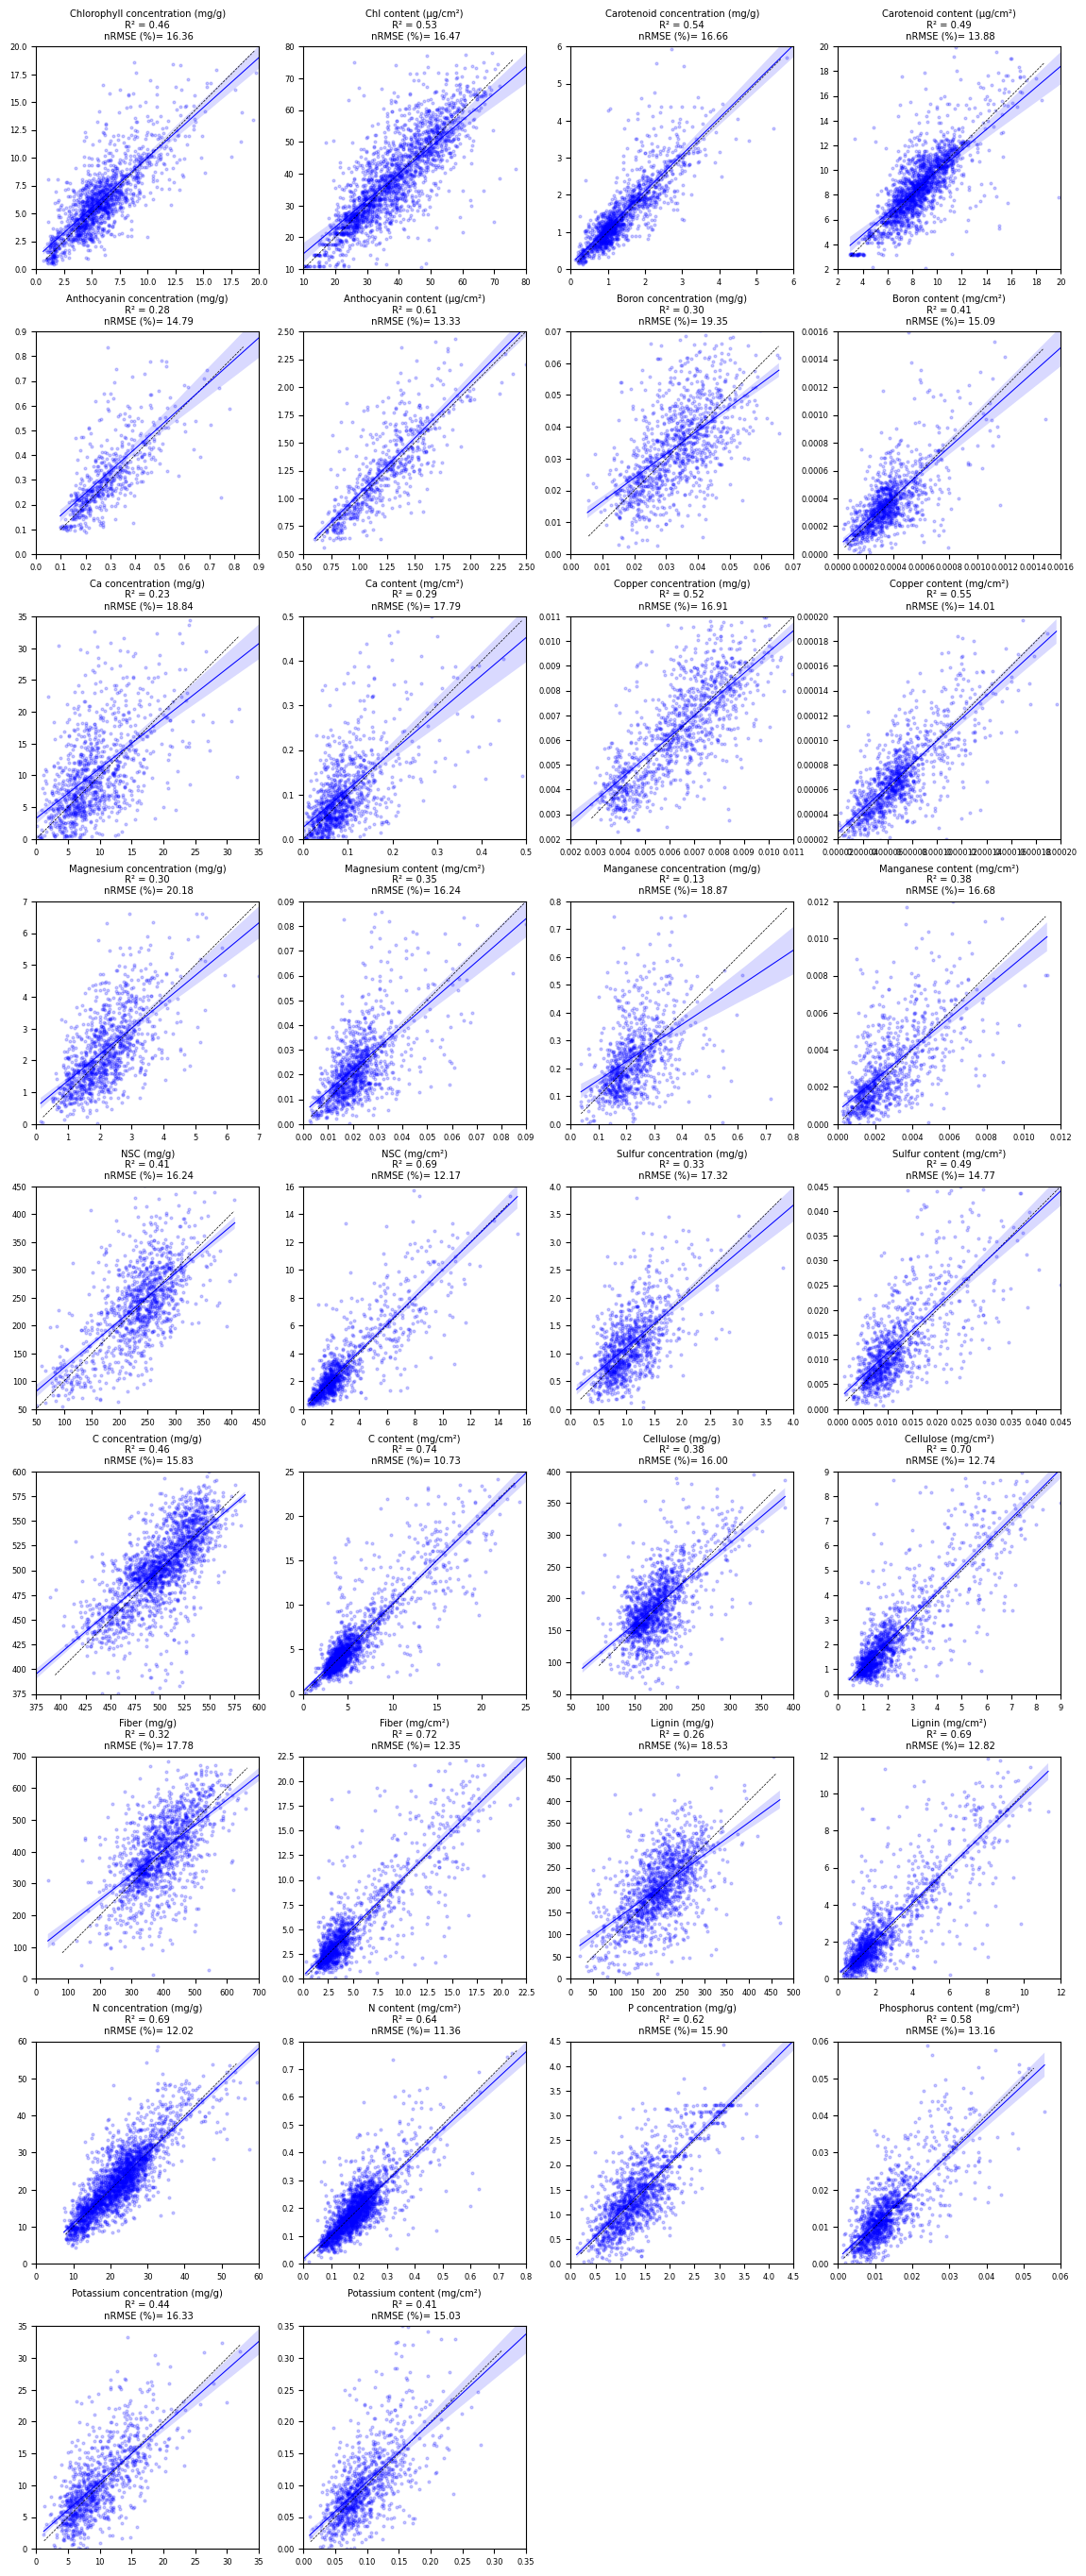

In [10]:
quantile_vis = 0.999
plt.rc('font', size=6) #7
plt.rcParams['lines.markersize'] = 2
plt.rcParams['lines.linewidth'] = 0.5

# a = round((len(run_area)+1)/2)  # number of rows
a = len(run_area) # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,66))

for i in run_area:
    if '(μg/cm²)' in i:
        pred_tr = preds[i + ' Predictions'].T*(10/preds['LMA (g/m²) Predictions']).T
    if '(mg/cm²)' in i:
        pred_tr = preds[i + ' Predictions'].T*(10000/preds['LMA (g/m²) Predictions']).T

    obs_tr = obs.loc[:, run_mass[run_area.index(i)]]

    idx = np.union1d(obs_tr[obs_tr.isna()].index,pred_tr[pred_tr.isna()].index)

    obs_tr.drop(idx, axis = 0, inplace=True)
    pred_tr.drop(idx, axis = 0, inplace=True)
    
    ax1 = scatter_indiv(obs_tr, pred_tr, a, b, c, quantile_vis)
    
    r2 = r2_score(obs_tr,pred_tr)
    RMSE = math.sqrt(mean_squared_error(obs_tr,pred_tr))
    nRMSE = (RMSE*100)/(np.nanquantile(np.array(obs_tr),0.99) - np.nanquantile(np.array(obs_tr),0.01))
    
    plt.title(run_mass[run_area.index(i)]+ '\n R² = {0:.2f} \n nRMSE (%)= {1:.2f}'.format(r2,nRMSE))
    
    c = c + 1
    
    #####################
    
    obs_tr = obs.loc[:, i]
    pred_tr = preds[i + ' Predictions']

    idx = np.union1d(obs_tr[obs_tr.isna()].index,pred_tr[pred_tr.isna()].index)

    obs_tr.drop(idx, axis = 0, inplace=True)
    pred_tr.drop(idx, axis = 0, inplace=True)
    
    ax1 = scatter_indiv(obs_tr, pred_tr, a, b, c, quantile_vis)
    
    r2 = r2_score(obs_tr,pred_tr)
    RMSE = math.sqrt(mean_squared_error(obs_tr,pred_tr))
    nRMSE = (RMSE*100)/(np.nanquantile(np.array(obs_tr),0.99) - np.nanquantile(np.array(obs_tr),0.01))
    
    plt.title(i+ '\n R² = {0:.2f} \n nRMSE (%)= {1:.2f}'.format(r2,nRMSE))
    c = c +1
      
# plt.savefig(dir_n + 'AreavsMass_scatterplot_effIncomp.pdf',bbox_inches = 'tight', dpi = 100)
# plt.savefig(dir_n + 'AreavsMass_scatterplot_effIncomp.svg',bbox_inches = 'tight', dpi = 100)

# Importance coefficients ##

In [8]:
######## Calculate Shap Coeff Incomplete ########

paths = ['./models/multi_{}/incomplete/'.format(i) for i in range(1,6)]
output_shape = 20
glob = []

for path in paths:
    json_file = open(path+ 'Model.json'.format(output_shape), 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    best_model = model_from_json(loaded_model_json)

    scaler_list = load(open(path+ 'scaler_global.pkl', 'rb'))

    # load weights into new model
    best_model.load_weights(path+ 'Trial_weights.h5'.format(output_shape))

    db, test_X, y = read_db('datasetd/testCV_{}.csv'.format(paths.index(path)+1),sp=True)

    explainer_g1 = shap.GradientExplainer(best_model, test_X.to_numpy().reshape((test_X.shape[0],test_X.shape[1],1)))
    shap_values_g1= explainer_g1.shap_values(test_X.to_numpy().reshape((test_X.shape[0],test_X.shape[1],1)))

    glob.append(np.median(np.abs(np.array(shap_values_g1).mean(3)),axis=1))

avg = np.median(np.array(glob),axis=0)

### save the coefs ##
# file = open('evaluation/5CV_shap_values_incomp.pkl', 'wb')
# dump(glob, file)          
# file.close()

Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
2023-01-31 22:36:06.834465: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8100
2023-01-31 22:36:07.351311: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-01-31 22:36:07.351861: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-01-31 22:36:07.351873: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-01-31 22:36:07.352423: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-01-31 22:36:07.352457: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will

In [ ]:
######## Calculate PLSR Coeff ########


for j in range(len(test_tr)):
    paths = [dir_n + 'models/plsrsing_{}/'.format(i) for i in range(1,6)]
    
    coeff = []
    for path in paths:
        model1 = load(open(path + '/model_{}.pkl'.format(Traits.index(test_tr[j])), 'rb'))
        coef1 = pd.DataFrame(model1.regressor_.coef_)
        coeff.append(coef1)
        
# file = open('evaluation/5CV_plsr_coeff.pkl', 'wb')
# dump(coef1, file)          
# file.close()

In [11]:
###### upload coeff ####
file = open('evaluation/5CV_shap_values_incomp.pkl', 'rb')  
glob = load(file) 
file.close()


file = open('evaluation/5CV_plsr_coeff.pkl', 'rb')  
coef1 = load(file) 
file.close()

Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.


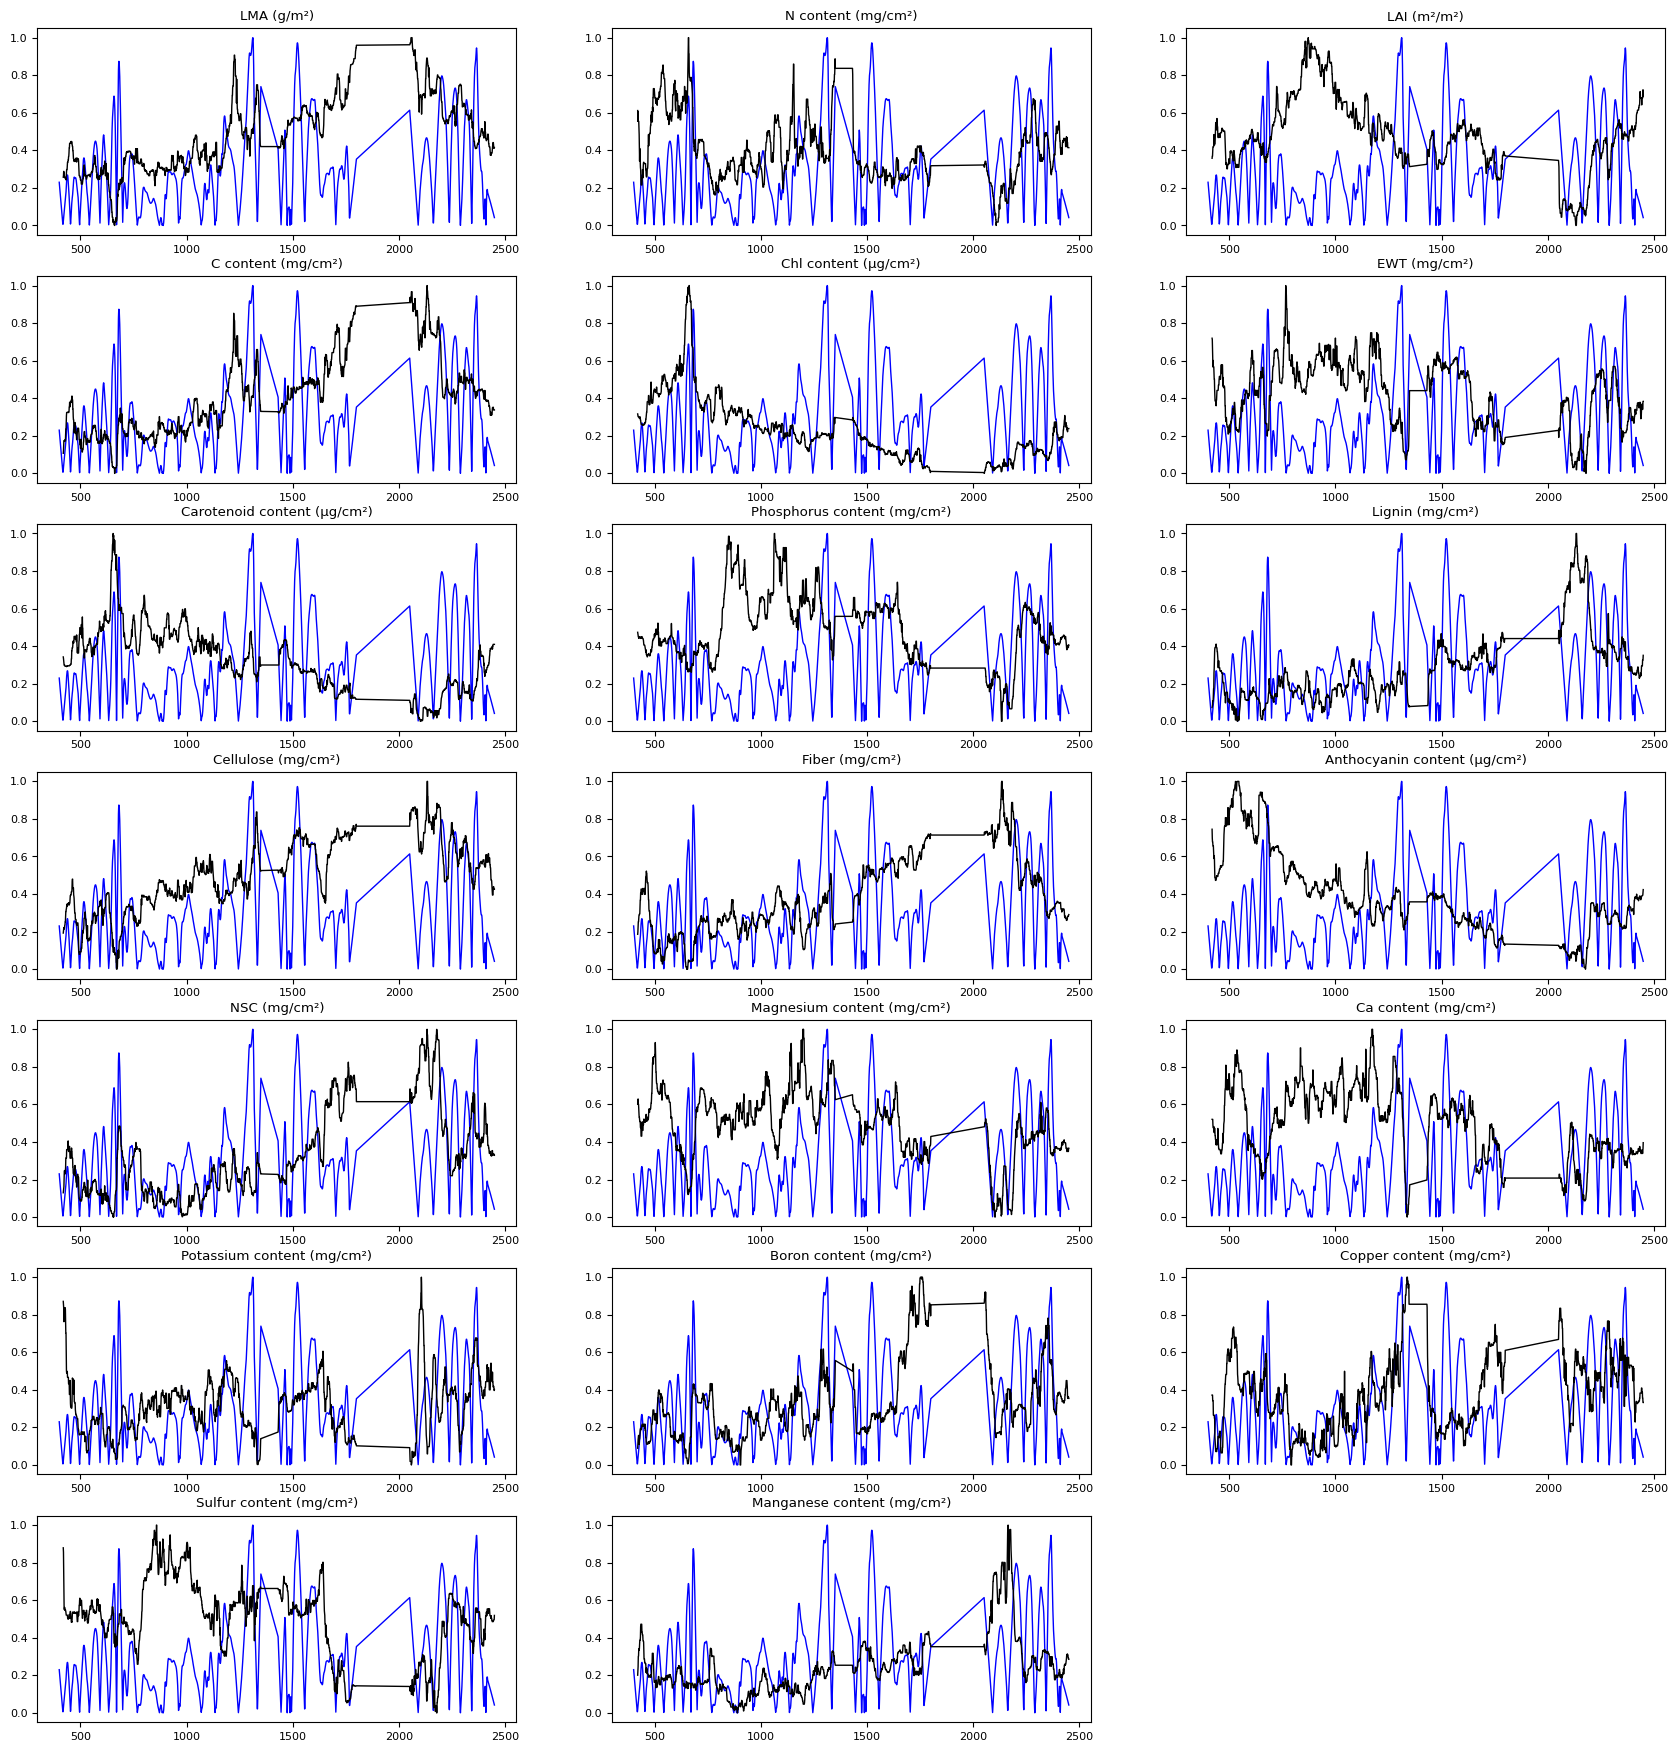

In [12]:
db, test_X, y = read_db('dataset/testCV_{}.csv'.format(1),sp=True)

wavelenghts = test_X.columns.astype('int')
shap_plot(Traits,Traits, glob, coef1, wavelenghts)

## Comparison between models ##

In [13]:
scores_1 = pd.read_csv('evaluation/scores_all_plsrsingle.csv').drop(['Unnamed: 0'],axis=1).T

scores_2 = pd.read_csv('evaluation/scores_all_cnnsingle.csv').drop(['Unnamed: 0'],axis=1).T

scores_3 = pd.read_csv('evaluation/scores_all_incomp.csv').drop(['Unnamed: 0'],axis=1).T

scores_4 = pd.read_csv('evaluation/scores_all_incompTRY.csv').drop(['Unnamed: 0'],axis=1).T

scores = pd.read_csv('evaluation/scores_all_inex.csv').drop(['Unnamed: 0'],axis=1).T


In [14]:
df_nrmse = pd.DataFrame()

df_nrmse['multi'] = cleanana(scores[2]/100)
df_nrmse['plsr'] = cleanana(scores_1[2]/100)
df_nrmse['dl'] = cleanana(scores_2[2]/100)
df_nrmse['muliNan'] = cleanana(scores_3[2]/100)
df_nrmse['muliNanTry'] = cleanana(scores_4[2]/100)

df_r2 = pd.DataFrame()

df_r2['multi'] = cleanana(scores[0])
df_r2['plsr'] = cleanana(scores_1[0])
df_r2['dl'] = cleanana(scores_2[0])
df_r2['muliNan'] = cleanana(scores_3[0])
df_r2['muliNanTry'] = cleanana(scores_4[0])

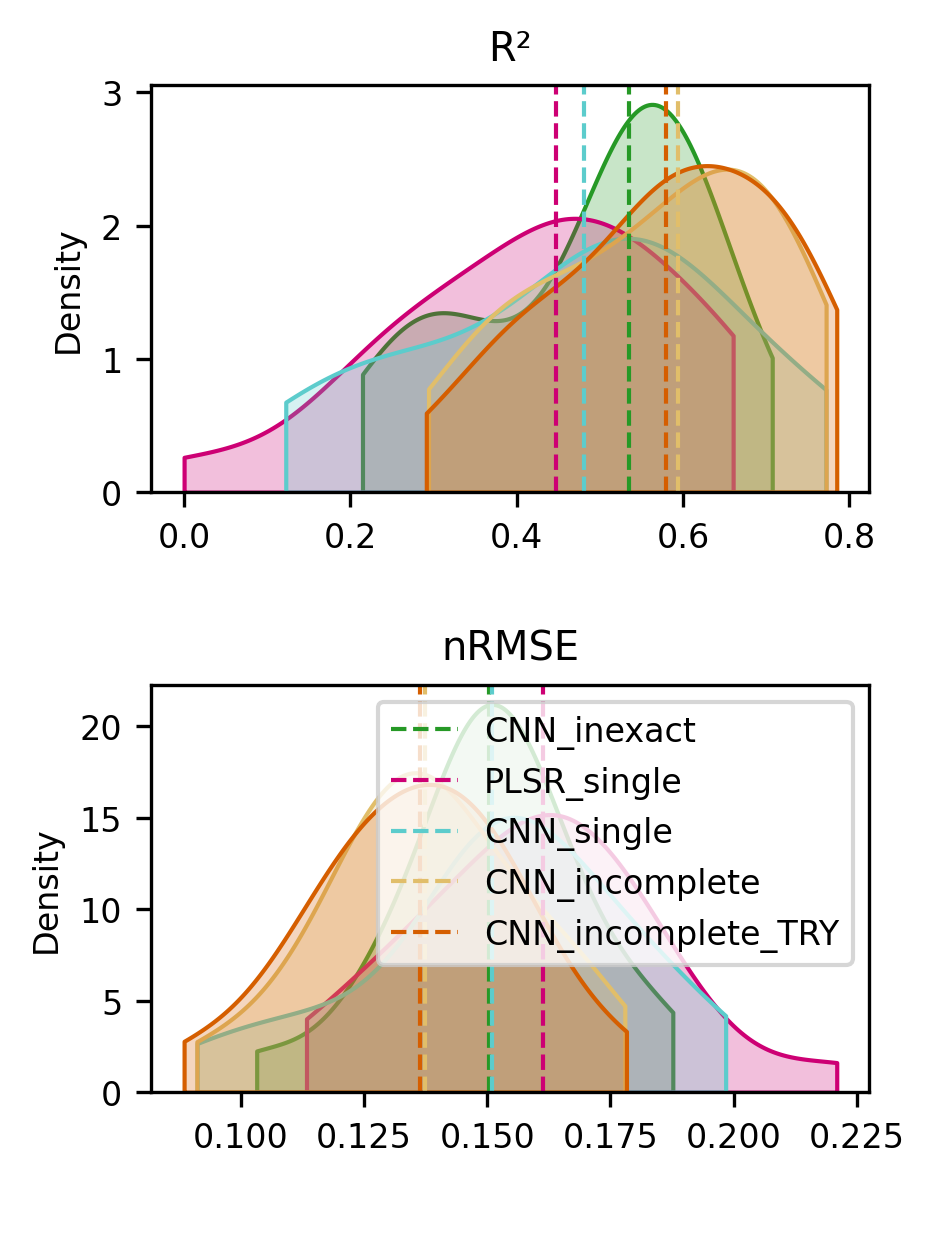

In [15]:
plt.rc('font', size=8)
# color = ['#269926',
# '#CD0074',
# '#5CCCCC',
# '#E1BE6A']

color = sns.color_palette('colorblind', 5)

fig, ax =plt.subplots(nrows=2, ncols=1,figsize=(3, 4),dpi=300, constrained_layout=True)

xmedian = np.nanmedian(cleanana(scores[0]))
ax1 = sns.kdeplot(data=cleanana(scores[0]), ax = ax[0], cut=0,fill=True, color='#269926')
ax1.axvline(xmedian, c='#269926',linestyle='--')

xmedian1 = np.nanmedian(scores_1[0])
ax1 =sns.kdeplot(data=scores_1[0], ax = ax[0], cut=0,fill=True, color='#CD0074')
ax1.axvline(xmedian1, c='#CD0074',linestyle='--')

xmedian2 = np.nanmedian(cleanana(scores_2[0]))
ax1 =sns.kdeplot(data= cleanana(scores_2[0]), ax = ax[0], cut=0,fill=True, color='#5CCCCC')
ax1.axvline(xmedian2, c='#5CCCCC',linestyle='--')

xmedian = np.nanmedian(cleanana(scores_3[0]))
ax1 = sns.kdeplot(data= cleanana(scores_3[0]), ax = ax[0], cut=0,fill=True, color='#E1BE6A')
ax1.axvline(xmedian, c='#E1BE6A',linestyle='--')

xmedian = np.nanmedian(cleanana(scores_4[0]))
ax1 = sns.kdeplot(data= cleanana(scores_4[0]), ax = ax[0], cut=0,fill=True, color=color[3])
ax1.axvline(xmedian, c=color[3],linestyle='--')

ax1.set(title ="R²", xlabel=' ')

###############

xmedian = np.nanmedian(cleanana(scores[2]/100))
ax1 =sns.kdeplot(data=cleanana(scores[2]/100), ax = ax[1], cut=0,fill=True, color='#269926')
ax1.axvline(xmedian, c='#269926',linestyle='--')

xmedian1 = np.nanmedian(cleanana(scores_1[2]/100))
ax1 =sns.kdeplot(data= cleanana(scores_1[2]/100), ax = ax[1], cut=0,fill=True, color='#CD0074')
ax1.axvline(xmedian1, c='#CD0074',linestyle='--')

xmedian2 = np.nanmedian(cleanana(scores_2[2]/100))
ax1 =sns.kdeplot(data= cleanana(scores_2[2]/100), ax = ax[1], cut=0,fill=True, color='#5CCCCC')
ax1.axvline(xmedian2, c='#5CCCCC',linestyle='--')

xmedian2 = np.nanmedian(scores_3[2]/100)
ax1 =sns.kdeplot(data= scores_3[2]/100, ax = ax[1], cut=0,fill=True, color='#E1BE6A')
ax1.axvline(xmedian2, c='#E1BE6A',linestyle='--')

xmedian2 = np.nanmedian(scores_4[2]/100)
ax1 =sns.kdeplot(data= scores_4[2]/100, ax = ax[1], cut=0,fill=True, color=color[3])
ax1.axvline(xmedian2, c=color[3],linestyle='--')

ax1.set(title ="nRMSE", xlabel=' ')

plt.legend(['CNN_inexact', 'PLSR_single','CNN_single', 'CNN_incomplete', 'CNN_incomplete_TRY'])


# fig.savefig(ir_n + 'DistribNoGF_big.pdf',bbox_inches = 'tight',dpi = 300)
# fig.savefig(ir_n + 'DistribNoGF_big.svg',bbox_inches = 'tight',dpi = 300)

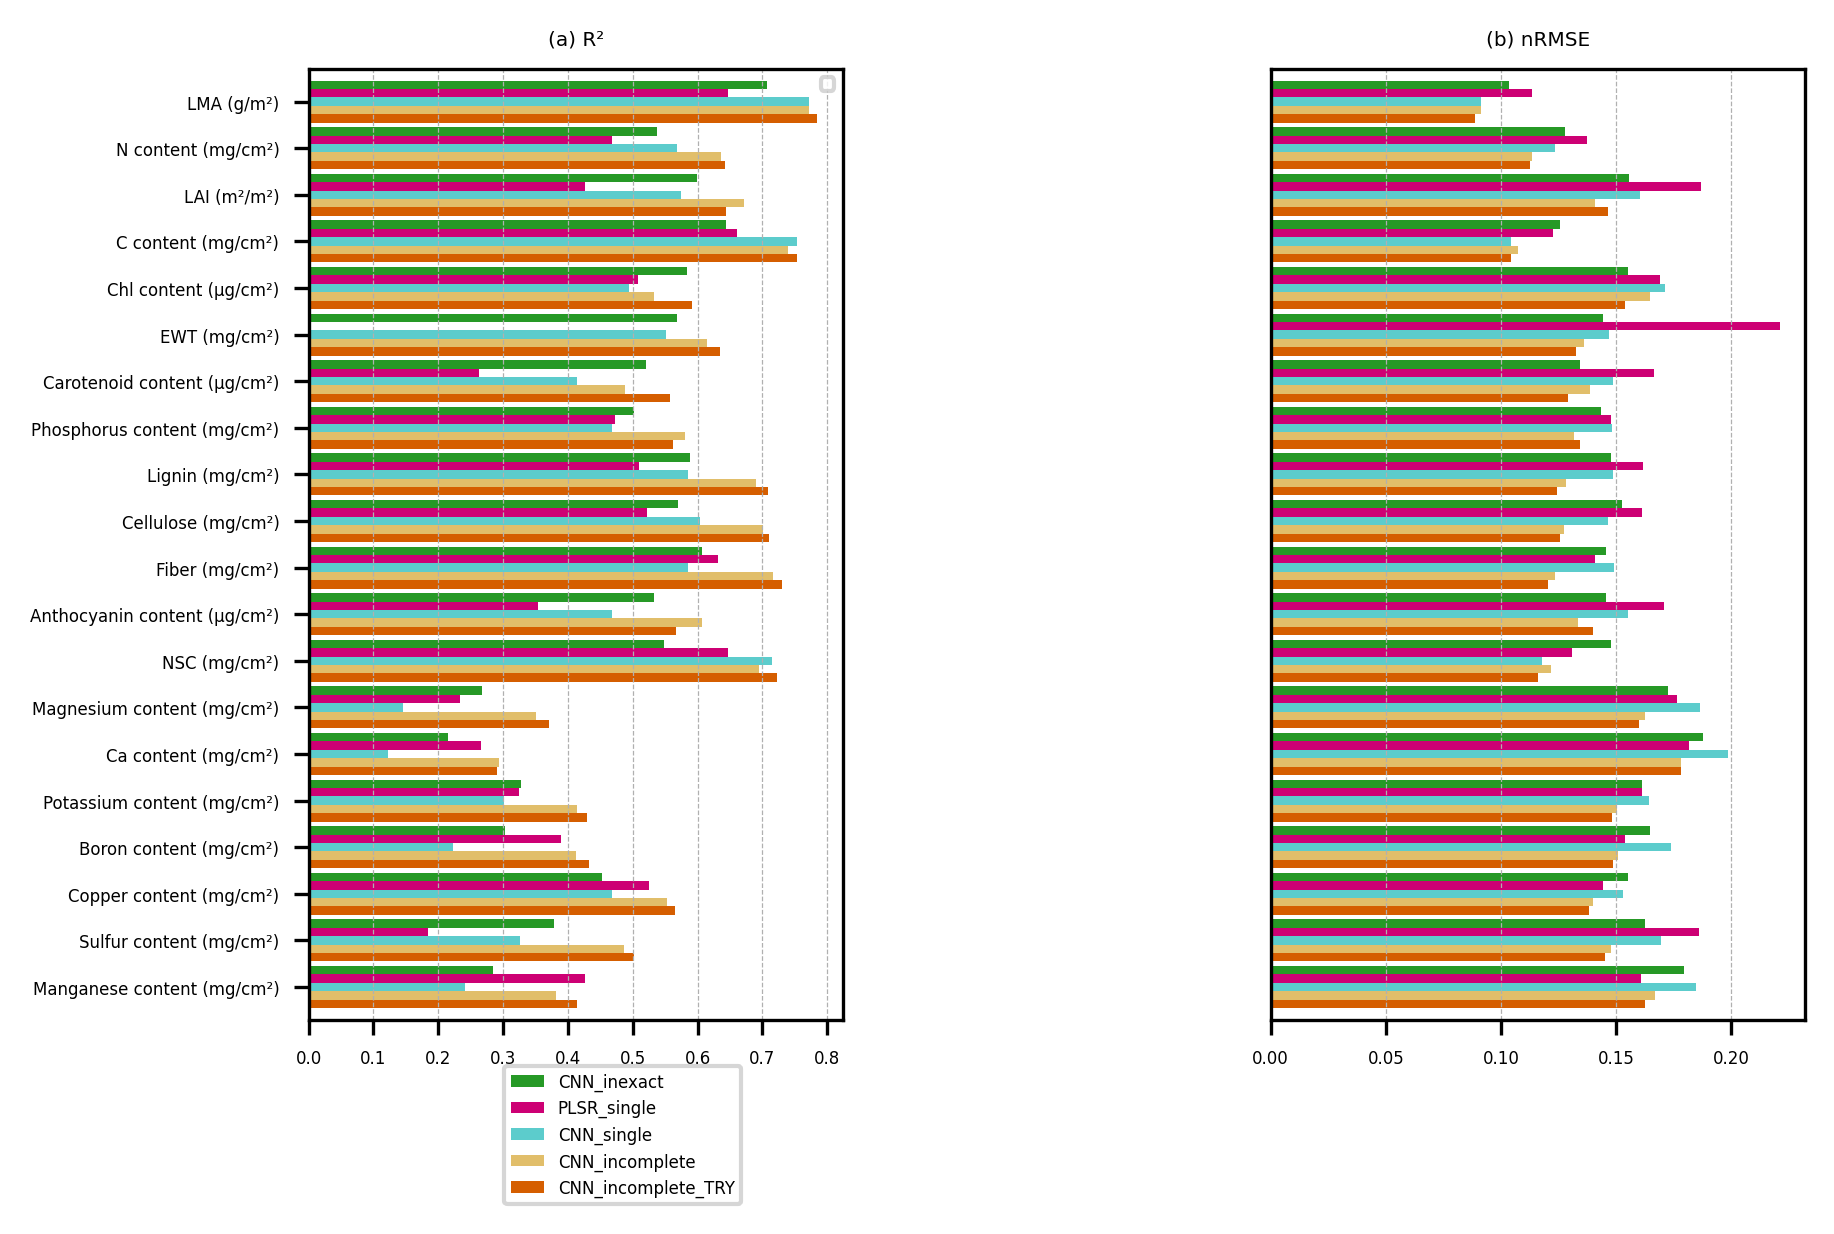

In [16]:
plt.rc('font', size=4)

colors = sns.color_palette('colorblind', 5)

color = {'multi': '#269926',
'plsr':'#CD0074',
'dl':'#5CCCCC',
'muliNan':'#E1BE6A',
'muliNanTry':  colors[3] }

fig , axes= plt.subplots(nrows=1, ncols=2, figsize=(6, 4), dpi=300 ,constrained_layout=True)

ax1 = df_r2.plot.barh(width=0.9, color= color,ax=axes[0], title = '(a) R²')
ax1.grid('on', which='minor', axis='x')
ax1.grid(axis='x', linestyle='--',linewidth=0.3)
ax1.invert_yaxis()
ax1.legend([])

ax2 = df_nrmse.plot.barh(width=0.9, color= color, ax=axes[1], title = '(b) nRMSE')
ax2.grid('on', which='minor', axis='x')
ax2.grid(axis='x', linestyle='--',linewidth=0.3)
ax2.invert_yaxis()
ax2.get_yaxis().set_visible(False)


plt.legend(['CNN_inexact', 'PLSR_single','CNN_single','CNN_incomplete', 'CNN_incomplete_TRY'],bbox_to_anchor=(-1.45,-0.04),loc='upper left')
plt.show()


# fig.savefig(dir_n + 'all_5models_NoGF_big.pdf',bbox_inches = 'tight',dpi = 300)
# fig.savefig(ir_n + 'all_5models_NoGF_big.svg',bbox_inches = 'tight',dpi = 300)

## Uncertainty estimation #######

In [3]:

paths = ['models/muli_{}/incomplete/'.format(i) for i in range(1,6)] ## >> path to the models objects
paths_train = ['dataset/fillCV_{}.csv'.format(i) for i in range(1,6)] ## >> path to the train data (5-fold splitting)
paths_test = ['dataset/testCV_{}.csv'.format(i) for i in range(1,6)] ## >> path to the test data (5-fold splitting)

In [ ]:
######### the calculattion of dissimilarities in the embedding space ##########

output_shape = 20
dis_tr = []
dis_ts = []

for i in range(1,6):
    db_train, X_train, y_train = read_db(paths_train[i-1],sp=True)
    db_test, X_test, y_test = read_db(paths_test[i-1],sp=True)
    
    json_file = open(paths[i-1] + 'Model.json'.format(output_shape), 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    best_model = model_from_json(loaded_model_json)

    scaler_list = load(open(paths[i-1] + 'scaler_global.pkl', 'rb'))

    # load weights into new model
    best_model.load_weights(paths[i-1] + 'Trial_weights.h5'.format(output_shape))
    
    ######### Embedding space for the last dropout layer ######
    activation_model = Model(inputs=best_model.input, outputs=best_model.layers[-3].output)
    activations_tr = activation_model.predict(X_train)
    activations_ts = activation_model.predict(X_test)
    
    comb = pd.concat([pd.DataFrame(activations_tr), pd.DataFrame(activations_ts)],axis=0).reset_index(drop=True)
    
    nbrs = NearestNeighbors(n_neighbors=5, algorithm='kd_tree').fit(comb) #kd_tree ball_tree
    distances, indices = nbrs.kneighbors(comb)
            
    dis_tr.append(distances[:X_train.shape[0]])
    dis_ts.append(distances[X_train.shape[0]:]/(distances[:X_train.shape[0]].mean()))

In [6]:
min_dist = pd.DataFrame(list(dis_ts[0].mean(axis=1))+ list(dis_ts[1].mean(axis=1))+ list(dis_ts[2].mean(axis=1))+ list(dis_ts[3].mean(axis=1))+ list(dis_ts[4].mean(axis=1))).reset_index(drop=True)
# min_dist.to_csv('evaluation/Mean5neighMinDist_42No13_CV5_Emb_Eucl_test.csv')

In [24]:
########## Load dissimilarities #########
# test_min = pd.read_csv('evaluation/Mean5neighMinDist_42_CV5_Emb_Eucl.csv').drop(['Unnamed: 0'], axis=1)
test_min = pd.read_csv('evaluation/Mean5neighMinDist_42No13_CV5_Emb_Eucl_test.csv').drop(['Unnamed: 0'], axis=1)

data_tr = pd.concat([test_min,residuals_error],axis=1)
data_tr.columns = ['MinDist_EmbEuc'] + Traits
data_tr

MinDist_EmbEuc  LMA (g/m²)  N content (mg/cm²)  LAI (m²/m²)  \
0           4.487513    0.006982            0.098732          NaN   
1           3.516458    0.046334            0.038070          NaN   
2           3.687756    0.282949            0.440204          NaN   
3           3.142205    0.044467            0.068461          NaN   
4           3.126499    0.002048            0.057343          NaN   
...              ...         ...                 ...          ...   
5568        5.407354    0.258538            0.521235          NaN   
5569        3.992891    0.318411            0.279870          NaN   
5570        4.161749    0.466770            0.153591          NaN   
5571        2.651746    0.047950            0.158580          NaN   
5572        3.735215    0.072987            0.222111          NaN   

      C content (mg/cm²)  Chl content (μg/cm²)  EWT (mg/cm²)  \
0                    NaN              0.127508      0.301780   
1                    NaN              0.286372      0.174851   
2                    NaN              0.230865      0.849645   
3                    NaN              0.082372      0.105705   
4                    NaN              0.062189      0.027362   
...                  ...                   ...           ...   
5568            0.098885                   NaN           NaN   
5569            0.211226                   NaN           NaN   
5570            0.343542                   NaN           NaN   
5571            0.031865              0.320016           NaN   
5572            0.074413                   NaN           NaN   

      Carotenoid content (μg/cm²)  Phosphorus content (mg/cm²)  \
0                             NaN                          NaN   
1                             NaN                          NaN   
2                             NaN                          NaN   
3                             NaN                          NaN   
4                             NaN                          NaN   
...                           ...                          ...   
5568                          NaN                     0.559796   
5569                          NaN                          NaN   
5570                          NaN                     0.267128   
5571                     0.265492                     0.300027   
5572                          NaN                          NaN   

      Lignin (mg/cm²)  ...  Fiber (mg/cm²)  Anthocyanin content (μg/cm²)  \
0                 NaN  ...             NaN                           NaN   
1                 NaN  ...             NaN                           NaN   
2                 NaN  ...             NaN                           NaN   
3                 NaN  ...             NaN                           NaN   
4                 NaN  ...             NaN                           NaN   
...               ...  ...             ...                           ...   
5568         0.258725  ...        0.138740                           NaN   
5569         0.257504  ...        0.232070                           NaN   
5570         0.219887  ...        0.326650                           NaN   
5571         0.008962  ...        0.035914                           NaN   
5572         0.027431  ...        0.065562                           NaN   

      NSC (mg/cm²)  Magnesium content (mg/cm²)  Ca content (mg/cm²)  \
0              NaN                    0.003197             0.511477   
1              NaN                    0.057003             0.080982   
2              NaN                    0.507390             0.419376   
3              NaN                    0.048325             0.105702   
4              NaN                    0.032917             0.028796   
...            ...                         ...                  ...   
5568      0.063056                    0.070476             0.475613   
5569      0.014643                    0.437876             0.950838   
5570      0.285177                    0.059224             0.23

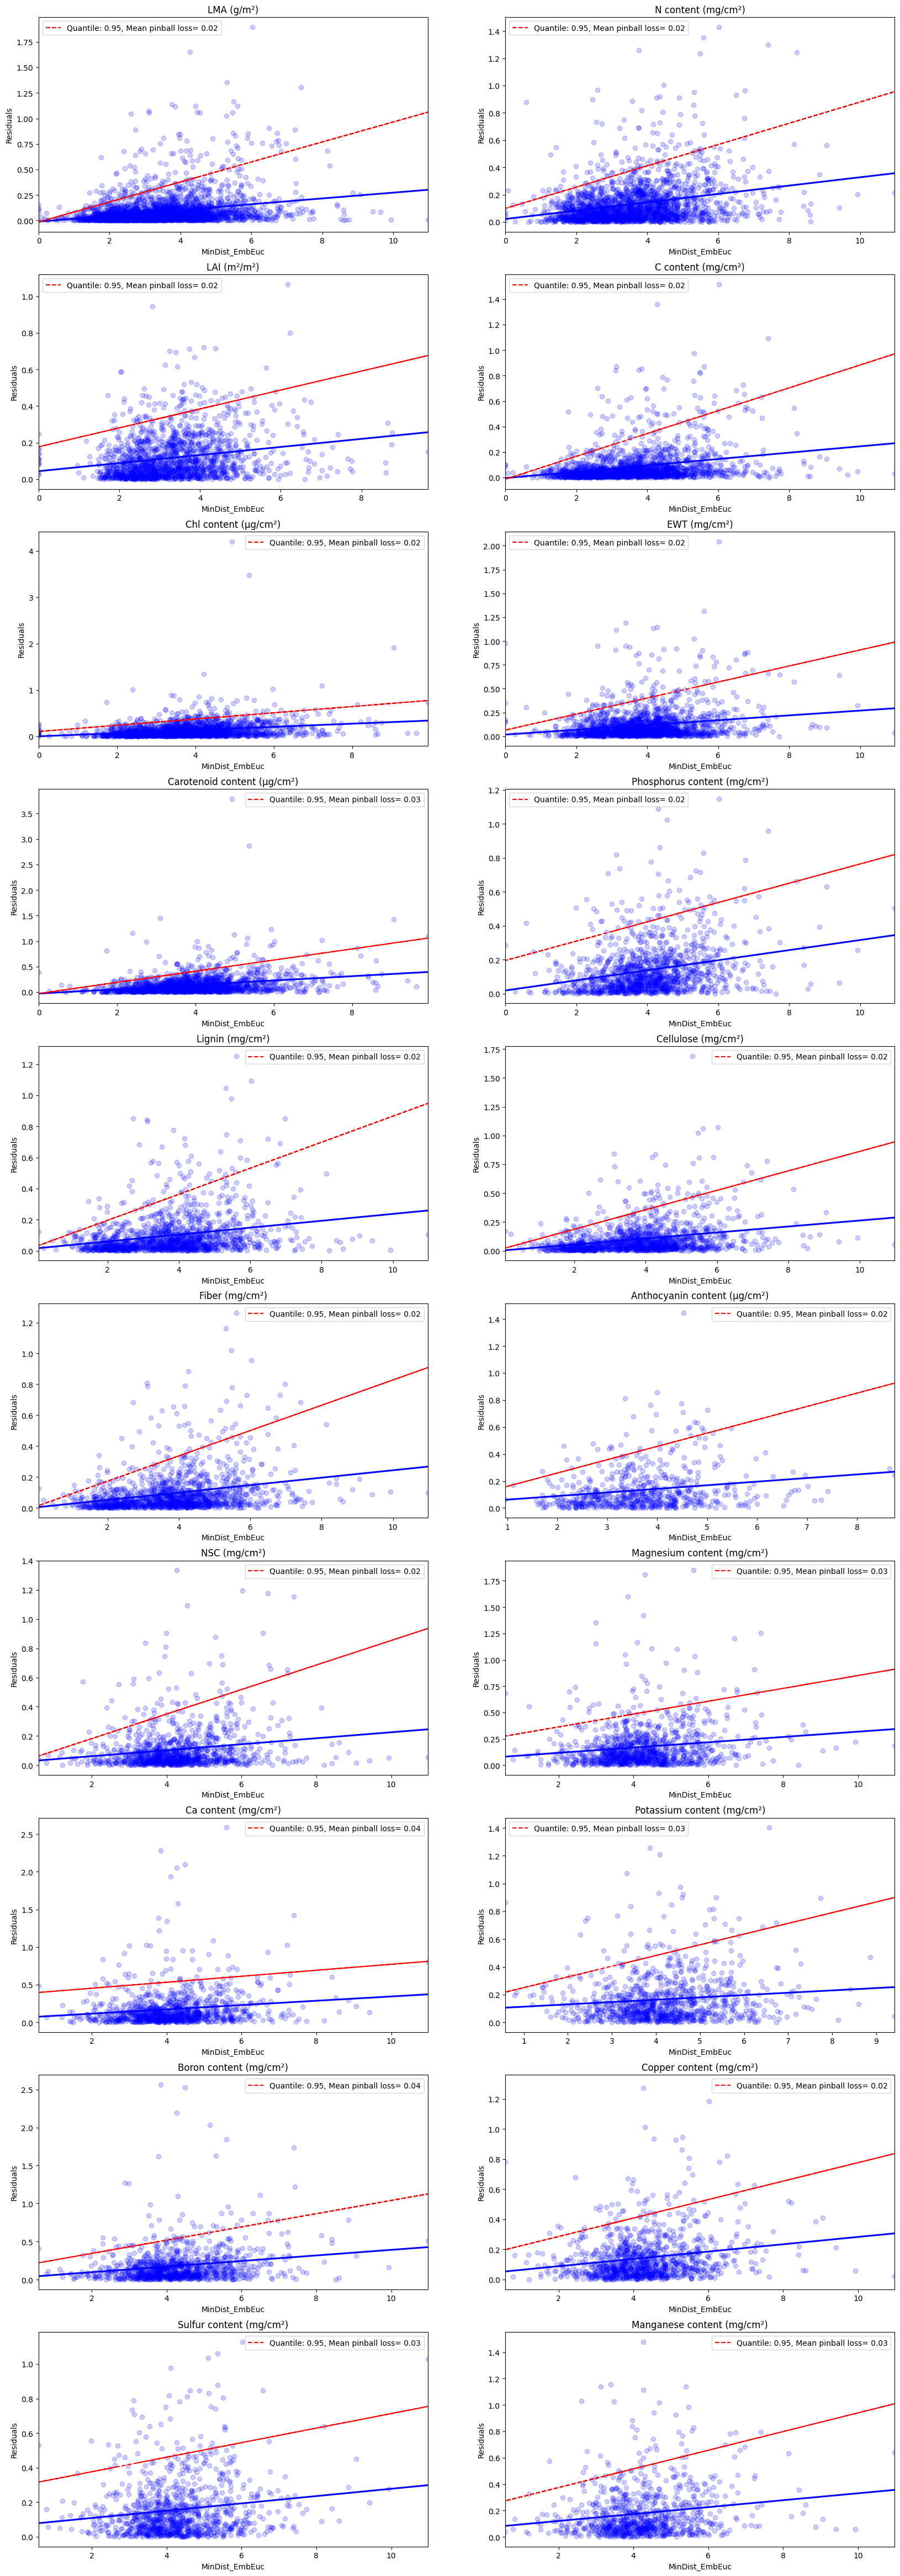

In [25]:
######oop ####### One predictor ########
plt.rc('font', size=10)

a = len(Traits) # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

plt.figure(figsize=(20, 120))

for i in range(len(Traits)):
    
    res = data_tr.loc[:,Traits[i]]
    dd = data_tr.loc[:,'MinDist_EmbEuc']

    idx = np.union1d(res[res.isna()].index,dd[dd.isna()].index)

    res.drop(idx, axis = 0, inplace=True)
    dd.drop(idx, axis = 0, inplace=True)
        
    quantiles = [0.95]

    predictions = {}
    scores = {}
    solver = "highs"

    for quantile in quantiles:
        qr = QuantileRegressor(quantile=quantile, alpha=0, solver=solver)
        y_pred = qr.fit(np.array(dd).reshape(-1, 1), res).predict(np.array(dd).reshape(-1, 1))
        pinball_metric = mean_pinball_loss(res, y_pred, alpha=quantile)
        predictions[quantile] = y_pred
        scores[quantile] = pinball_metric

            
    plt.subplot(a, b, c)
    plt.xlabel(Traits[i]) 
    
    sns.regplot(x= dd, y=res,color='b',fit_reg= True, order=1,scatter_kws={"color": "blue", 'alpha':0.2},ci=None)

    for quantile, y_pred in predictions.items():
        plt.plot(dd, y_pred, label=f"Quantile: {quantile}"+ ', Mean pinball loss= {:.2f}'.format(scores[quantile]),color="red", linestyle="dashed",)
        plt.xlabel(data_tr.columns[0])
        plt.ylabel('Residuals')
   

    plt.title(Traits[i])
    plt.legend()
    c = c + 1
        
# plt.savefig("evaluation/Mean5neigh_95Quantile_uncertainty_estimation_{}.pdf".format('MinDist_EmbEuc'),bbox_inches = 'tight', dpi = 300)
# plt.savefig("evaluation/Mean5neigh_95Quantile_uncertainty_estimation_{}.svg".format('MinDist_EmbEuc'),bbox_inches = 'tight', dpi = 300)